In [84]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud , STOPWORDS 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

%matplotlib inline

inputDF = pd.read_csv('listings.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Namita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Namita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Namita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [73]:
inputDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [36]:
inputDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   name                    3818 non-null   object 
 2   summary                 3641 non-null   object 
 3   longitude               3818 non-null   float64
 4   latitude                3818 non-null   float64
 5   space                   3249 non-null   object 
 6   description             3818 non-null   object 
 7   instant_bookable        3818 non-null   object 
 8   neighborhood_overview   2786 non-null   object 
 9   neighbourhood_cleansed  3818 non-null   object 
 10  host_id                 3818 non-null   int64  
 11  host_name               3816 non-null   object 
 12  host_since              3816 non-null   object 
 13  host_response_time      3295 non-null   object 
 14  street                  3818 non-null   

In [37]:
inputDF.isnull().sum()

id                           0
name                         0
summary                    177
longitude                    0
latitude                     0
space                      569
description                  0
instant_bookable             0
neighborhood_overview     1032
neighbourhood_cleansed       0
host_id                      0
host_name                    2
host_since                   2
host_response_time         523
street                       0
zipcode                      7
review_scores_rating       647
property_type                1
room_type                    0
accommodates                 0
bathrooms                   16
bedrooms                     6
beds                         1
reviews_per_month          627
amenities                    0
cancellation_policy          0
number_of_reviews            0
price                        0
dtype: int64

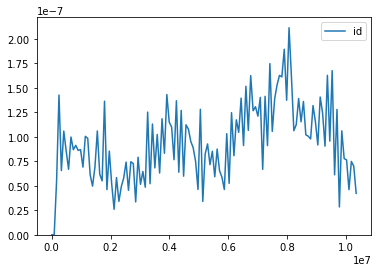

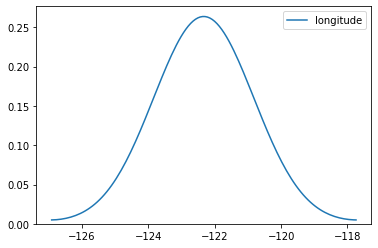

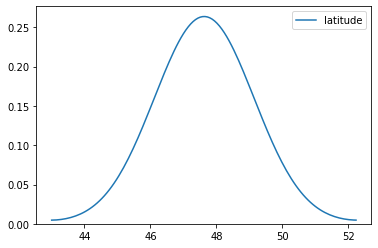

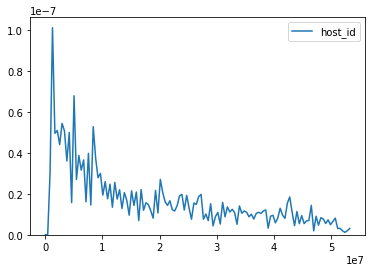

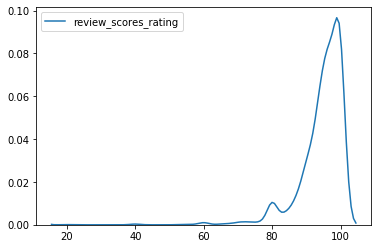

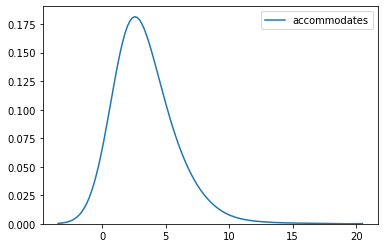

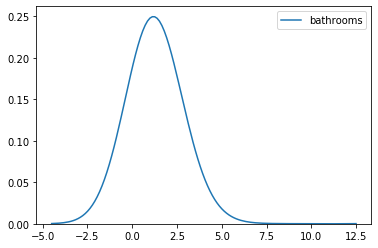

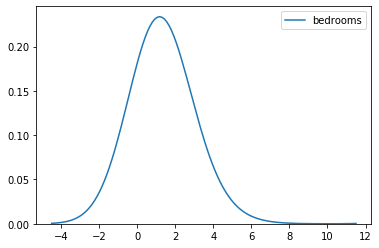

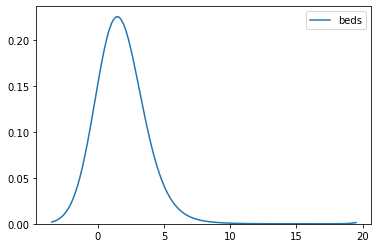

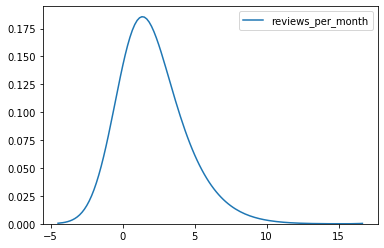

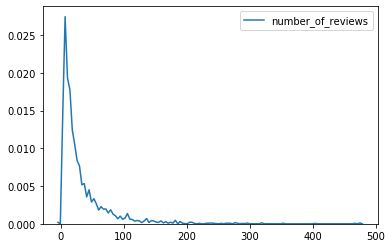

In [38]:
for feature in inputDF.columns:
    if inputDF[feature].dtype!='O':
        sns.kdeplot(inputDF[feature],bw=1.5)
        plt.show()
    

In [31]:
# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

In [58]:
#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [40]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


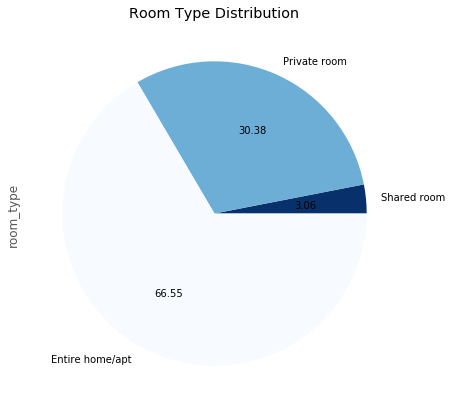

In [48]:
room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,7), 
                 fontsize = 10, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

Text(0, 0.5, 'Number of listings')

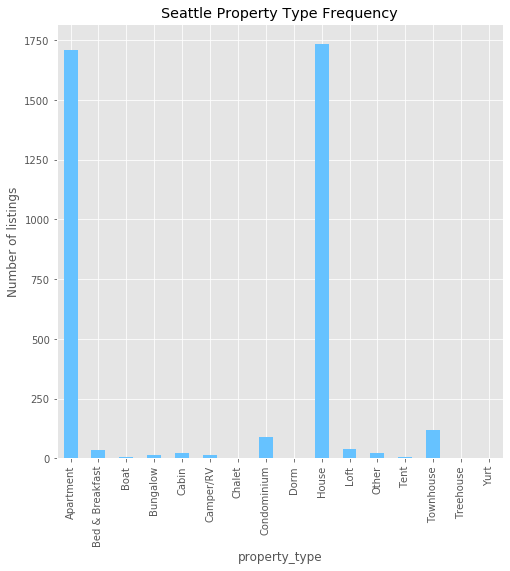

In [70]:
propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(8,8), 
           title = 'Seattle Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [60]:
roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
6,Boat,Entire home/apt,447.250000
36,Treehouse,Entire home/apt,200.000000
33,Townhouse,Entire home/apt,197.166667
21,House,Entire home/apt,191.128635
17,Condominium,Entire home/apt,167.902778


(16.5, -0.5)

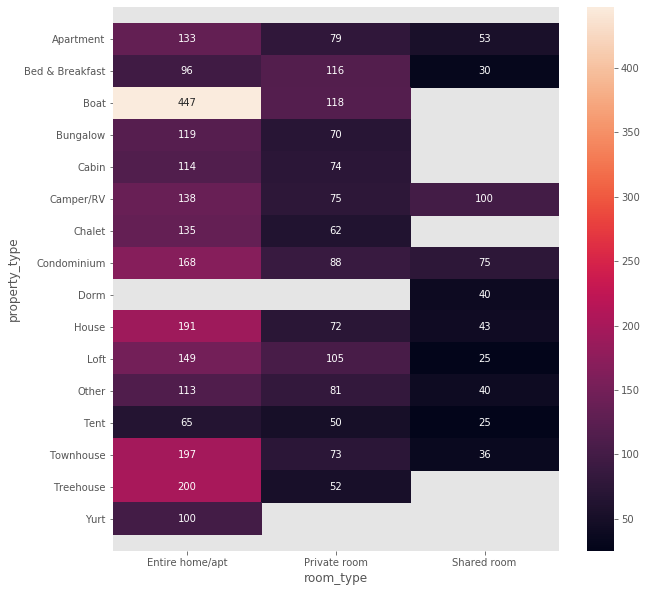

In [64]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(inputDF.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(87.5, -0.5)

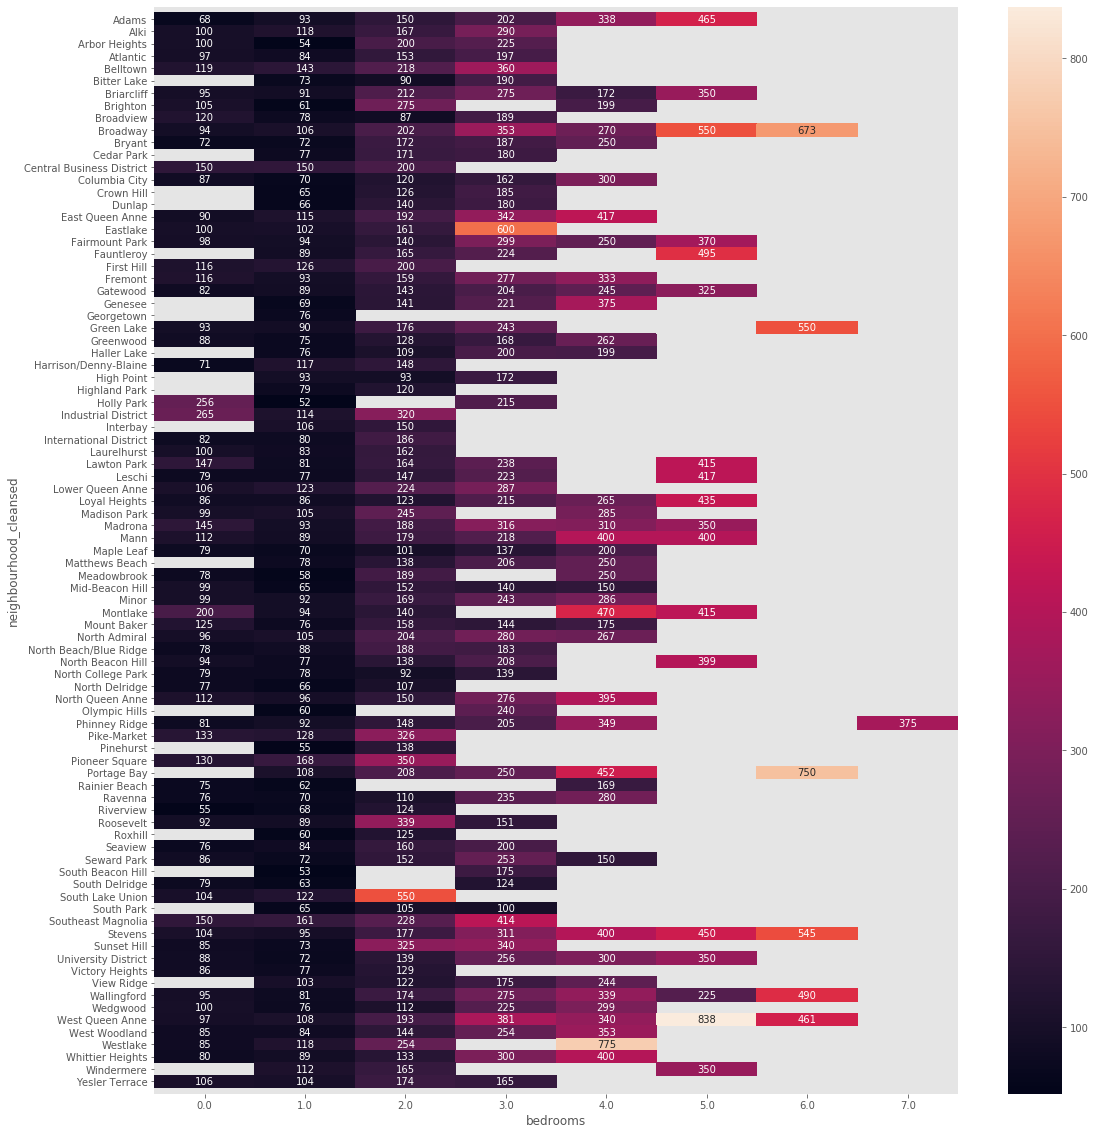

In [66]:
plt.figure(figsize=(18,20))
ax = sns.heatmap(inputDF.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [67]:
summaryDF = inputDF[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
3122,2 bedroom fully finished basement apartment wi...,1000.0
1208,100% Walk Score close to the Convention Center...,999.0
2,New modern house built in 2013. Spectacular s...,975.0
3443,Beautiful home that is located quiet neighborh...,950.0
1279,Fully updated by professional interior designe...,899.0


In [85]:
ords=''
words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'bedroom fully finished basement apartment separate'

In [89]:
def plot_display(plot_words_list):
    wordcloud = WordCloud(width = 800, height = 700).generate(plot_words_list)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

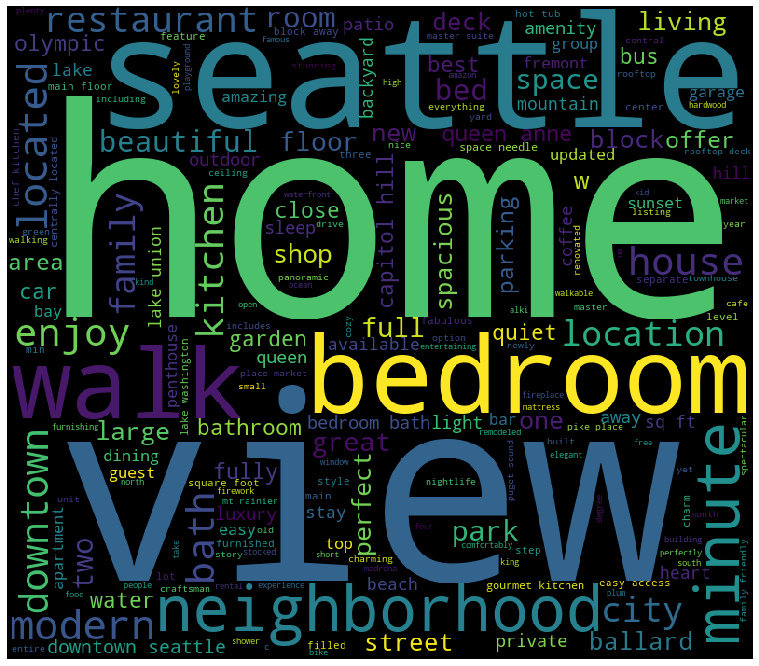

In [90]:
plot_display(final_words)

In [91]:
import re

amenitiesDF = inputDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

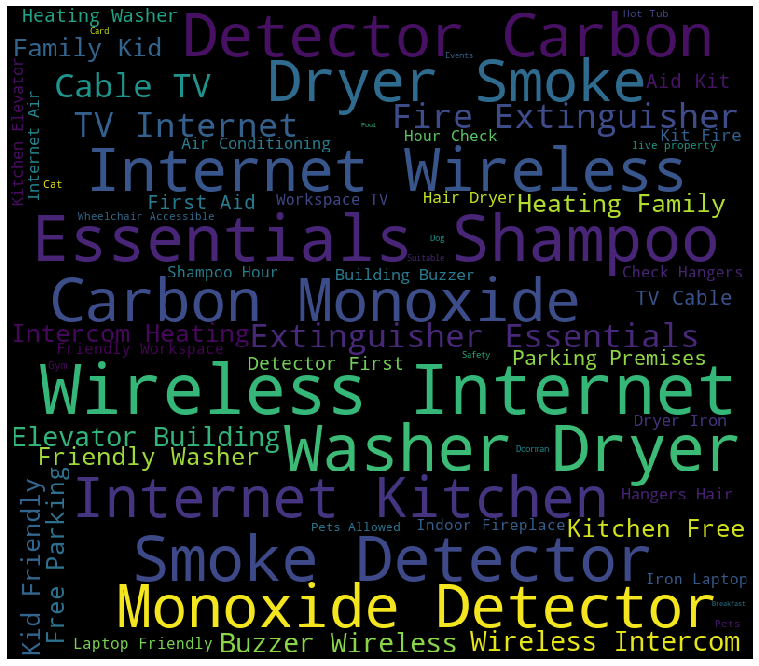

In [92]:
plot_display(allemenities_words)

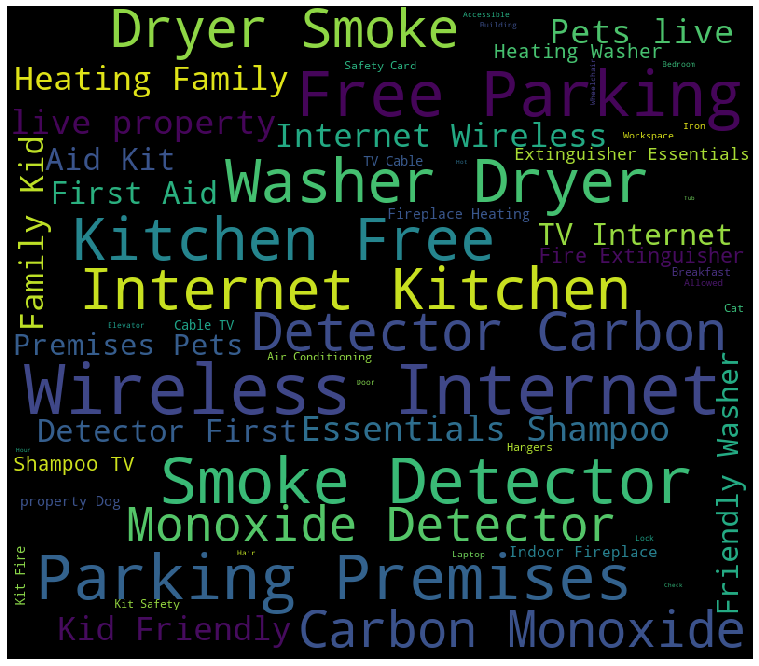

In [94]:
amenitiesDFbott =amenitiesDF.sort_values('price',ascending=[1])
amenitiesDFbottom=amenitiesDFbott.head(30)

allemenitiesb = ''
for index,row in amenitiesDFbottom.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenitiesb+=p

allemenities_datab=nltk.word_tokenize(allemenitiesb)
filtered_datab=[word for word in allemenities_datab if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_datab=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_datab)
plot_display(allemenities_wordsb)